In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

In [8]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

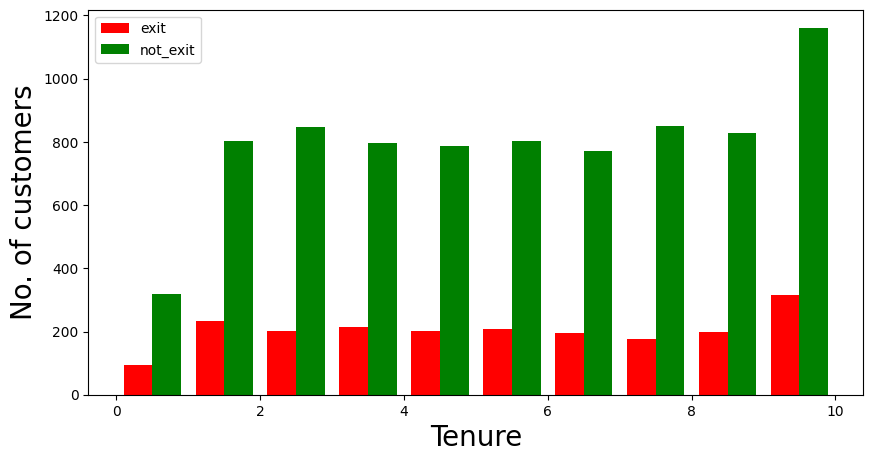

In [9]:
visualization(df_churn_exited, df_churn_not_exited, "Tenure")

In [10]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

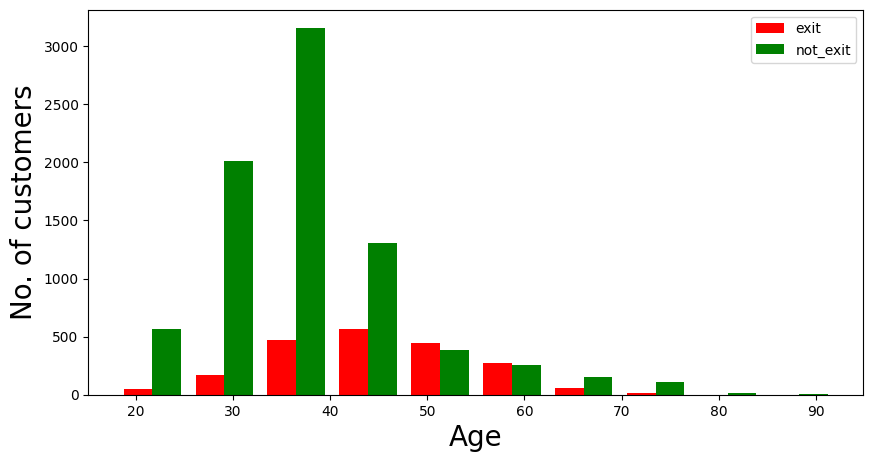

In [11]:
visualization(df_churn_exited2,df_churn_not_exited2, 'Age')

In [12]:
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [13]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [14]:
df = pd.concat([df,gender,states], axis = 1)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,True,True,False


In [15]:
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]
y=df[['Exited']]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [18]:
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
import keras

In [20]:
!pip install tensorflow


In [21]:
import keras

In [22]:
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers

In [23]:
classifier = Sequential()

In [24]:
classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))   #Adding second hidden layers

In [26]:
classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform"))

In [27]:
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy'])

In [28]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
classifier.fit(X_train,y_train,batch_size=10,epochs=50)

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7885 - loss: 0.5724
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7931 - loss: 0.4311
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8104 - loss: 0.4132
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8322 - loss: 0.4095
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8282 - loss: 0.4154
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8376 - loss: 0.4011
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8374 - loss: 0.4032
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8368 - loss: 0.4138
Epoch 9/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8361 - loss: 0.4032
Epoch 10/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8423 - loss: 0.3985
Epoch 11/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8312 - loss: 0.4039
Epoch 12/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [30]:
y_pred =classifier.predict(X_test)
print(y_pred)
print(y_pred.shape)
y_pred = (y_pred > 0.5)
print(y_pred)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0.17612754]
 [0.2760512 ]
 [0.11314794]
 ...
 [0.17684211]
 [0.0287735 ]
 [0.0354096 ]]
(3000, 1)
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [32]:
cm = confusion_matrix(y_test,y_pred)

In [33]:
cm

array([[2312,   58],
       [ 464,  166]])

In [34]:
accuracy = accuracy_score(y_test,y_pred)

In [35]:
accuracy

0.826

Text(95.72222222222221, 0.5, 'Truth')

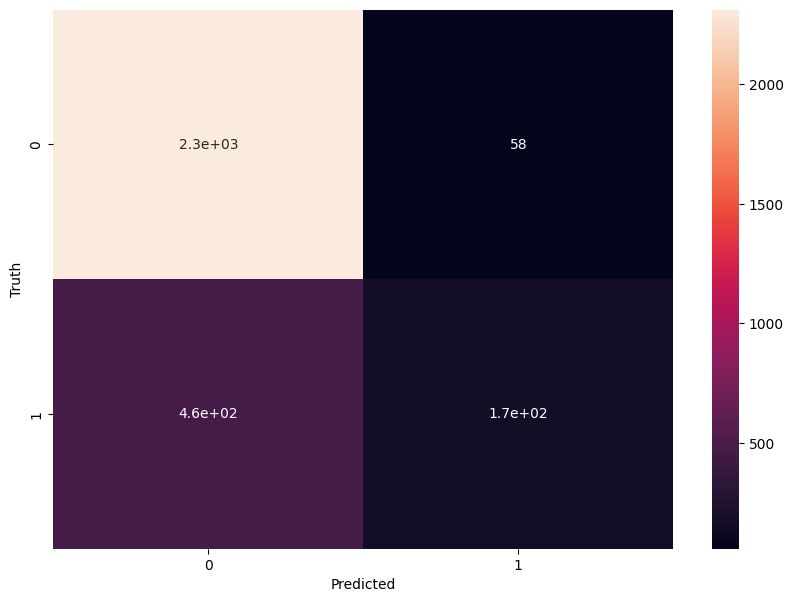

In [36]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2370
           1       0.74      0.26      0.39       630

    accuracy                           0.83      3000
   macro avg       0.79      0.62      0.64      3000
weighted avg       0.81      0.83      0.79      3000



In [38]:
new_customer = [[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]

In [39]:
new_customer = sc.transform(sc.transform(new_customer))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
new_prediction = classifier.predict(new_customer)
new_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.]], dtype=float32)

In [ ]:
new_prediction = (new_prediction > 0.5)
new_prediction

array([[False]])